## Support vector machine in Python

There are many different packages in Python that can let you use different machine learning algorithms really easy. The most popular package for general machine learning is [scikit-learn](https://scikit-learn.org/stable/), which contains many different algorithms. There are also packages more towards deep learning, such as tensorflow, pytorch and so on, but we will not cover them here. In this chapter, we will only use scikit-learn to learn these basics. You can easily install scikit-learn use a package manager. 

Let's see an example how to use it. We start by loading some [pre-existing datasets](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) in the scikit-learn, which comes with a few standard datasets. For example, the [iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) and [digits](http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits) datasets for classification and the [boston house prices](http://archive.ics.uci.edu/ml/datasets/Housing) dataset for regression. Using these existing datasets, we can easily test the algorithms that we are interested in. We will use the iris dataset for this section.

A dataset is a dictionary-like object that holds all the data and some metadata about the data. This data is stored in the .data member, which is a n_samples, n_features array. In the case of supervised problem, one or more target variables are stored in the .target member.

**Load iris data**

The iris dataset consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres.


| [![Iris Setosa](https://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg)](https://en.wikipedia.org/wiki/Iris_setosa)  | [![Iris Virginica](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/1920px-Iris_virginica.jpg)](https://en.wikipedia.org/wiki/Iris_virginica) | [![Iris Versicolor](https://upload.wikimedia.org/wikipedia/commons/2/27/Blue_Flag%2C_Ottawa.jpg)](https://en.wikipedia.org/wiki/Iris_versicolor) |
|:---:|:---:|:---:|
| Iris Setosa| Iris Virginica| Iris Versicolor|

Now let's use scikit-learn to train a SVM model to classify the different species of Iris. In order to have a better visualization, we will only use two features that can characterize the differences between the classes. 

In [ ]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import classification_report

plt.style.use('seaborn-v0_8-poster') #seaborn-poster has been deprecated
%matplotlib inline

In [3]:
# import the iris data
iris = datasets.load_iris()

print(iris.feature_names)
# only print the first 10 samples
print(iris.data[:10])
print('We have %d data samples with %d \
    features'%(iris.data.shape[0], iris.data.shape[1]))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
We have 150 data samples with 4     features


The data is always a 2D array, shape (n_samples, n_features), although the original data may have had a different shape. The following prints out the target names and the representatoin of the target using 0, 1, 2. Each of them represent a class. 

In [4]:
print(iris.target_names)
print(set(iris.target))

['setosa' 'versicolor' 'virginica']
{np.int64(0), np.int64(1), np.int64(2)}


Let's prepare the feature matrix $X$ and also the target $y$ for our problem. 

In [6]:
# let's just use two features, so that we can 
# easily visualize them
X = iris.data[:, [0, 2]]
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names
# get the classes
n_class = len(set(y))
print('We have %d classes in the data'%(n_class))

We have 3 classes in the data


If we can, we always want to plot the data out first to explore it. We can plot it as a scatter plot with different symbols for different classes. We can see with this two features, we can actually see they separate out from each other. Also, the boundary between these classes are fairly linear, thus all we need to do is to find a linear boundary between them. 

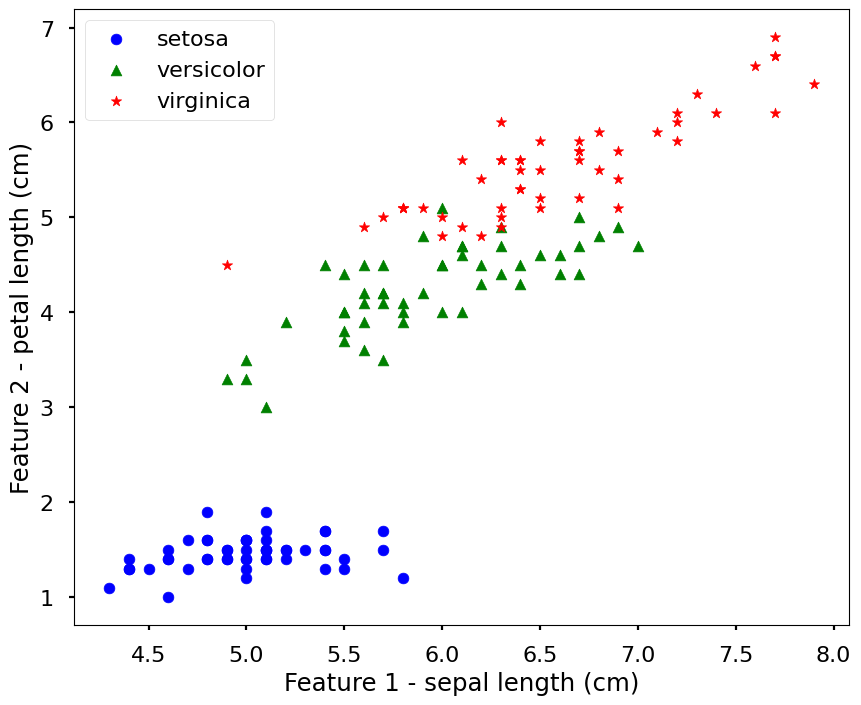

In [7]:
# let's have a look of the data first
colors = ['b', 'g', 'r']
symbols = ['o', '^', '*']
plt.figure(figsize = (10,8))
for i, c, s in (zip(range(n_class), colors, symbols)):
    ix = y == i
    plt.scatter(X[:, 0][ix], X[:, 1][ix], \
                color = c, marker = s, s = 60, \
                label = target_names[i])

plt.legend(loc = 2, scatterpoints = 1)
plt.xlabel('Feature 1 - ' + feature_names[0])
plt.ylabel('Feature 2 - ' + feature_names[2])
plt.show()

We now use the SVM in scikit-learn. The API is quite simple, for most of the algorithms they are similar. The use of the different algorithms are usually the following steps:

**Step 1:** initialize the model
**Step 2:** train the model using the *fit* function
**Step 3:** predict on the new data using the *predict* function

In [8]:
# Initialize SVM classifier
clf = svm.SVC(kernel='linear')

######################################
## WRITE YOUR CODE HERE (10 Points) ## 
######################################

# Hint: Use the `fit` function of the classifier to train the model with the feature matrix `X` and the target vector `y`.
# Train the classifier with data
clf.fit(X, y)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


The above print out from the *fit* function is the parameters used in the model, we can see that usually for a model there are many different parameters that you may need to tune. For SVM, two most important parameters are _C_ and *gamma*. We won't go into the details here, but a good advice is that before you use the model, always try to understand what these parameters are to get a good model. Now let's use the predict function on the training data, usually we don't do this, we need to split the data into training and testing dataset. For the testing dataset, which is not used in training at all, it is only saved for evaluation purposes. Here for simplicity, we just have a look of the results on the training data we used. 

In [9]:
# predict on the data
clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

We can plot the decision boundary for the model. The following function plot the decision boundary. 

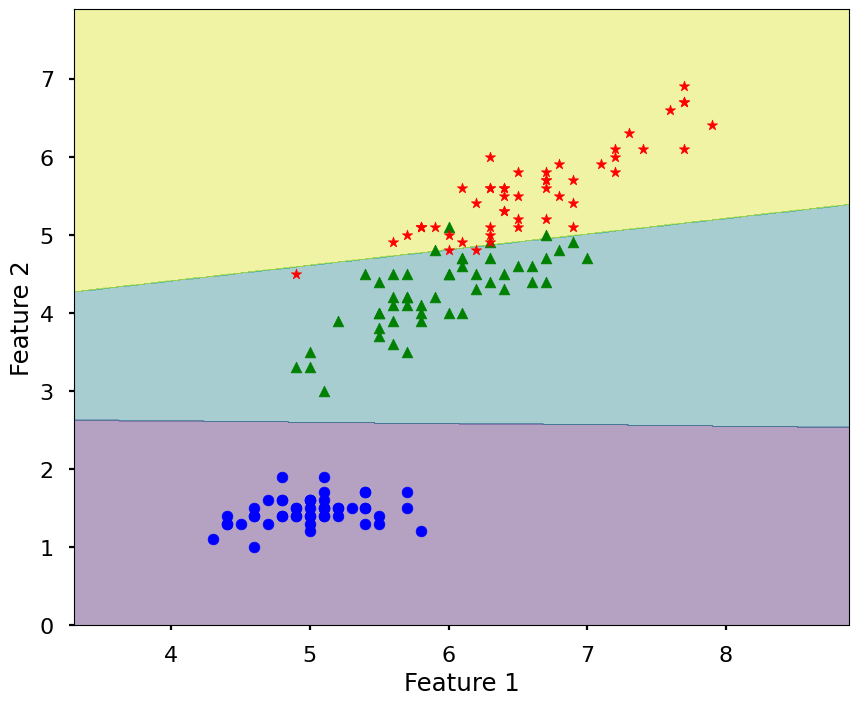

In [10]:
# Plotting decision regions
def plot_desicion_boundary(X, y, clf, title = None):
    '''
    Helper function to plot the decision boundary for the SVM
    '''
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    ######################################
    ## WRITE YOUR CODE HERE (15 Points) ## 
    ######################################

    # Hint: Use the `predict` method of the trained classifier `clf` to predict the class for each point in the mesh grid. 
    # The mesh grid points have been flattened and combined into a single array (np.c_[xx.ravel(), yy.ravel()]).
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize = (10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    
    for i, c, s in (zip(range(n_class), colors, symbols)):
        ix = y == i
        plt.scatter(X[:, 0][ix], X[:, 1][ix], \
                    color = c, marker = s, s = 60, \
                    label = target_names[i])
    
    if title is not None:
        plt.title(title)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
    
plot_desicion_boundary(X, y, clf)

We can see the linear boundaries found by the SVM for the 3 classes are generally good, and can separate most of the samples. 